In [16]:
%matplotlib inline
from pyleecan.Functions.save import save
from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR
from util.toyota_prius_generator import Toyota_Prius_Generator

from pyleecan.Classes.MachineIPMSM import MachineIPMSM
from pyleecan.Classes.Simu1 import Simu1
from pyleecan.Classes.OPdq import OPdq
from pyleecan.Classes.MagFEMM import MagFEMM
from pyleecan.Classes.InputCurrent import InputCurrent
import matplotlib.pyplot as plt
from numpy import sqrt
from os import makedirs
from os.path import join
# Load the machine
from util.simulation import *
from util.failures import *
from IPython.display import display, HTML


In [2]:
save_dir = "machines_custom3"
makedirs(save_dir, exist_ok=True)

In [8]:
# on génére une machine avec Ntcoil = 130 et ensuite on procede a la modification de sa géométrie 
gen_130 = Toyota_Prius_Generator(Ntcoil=130)

# Construiction de la machine 
machine_130 = MachineIPMSM(
    name="Toyota_Prius_Ntcoil_130_geom_modif",
    shaft=gen_130.create_shaft(),
    rotor=gen_130.create_rotor(),
    stator=gen_130.create_stator()
)

# Modification de la géométrie du stator et du rotor
machine_130.stator.slot.H0 = 0.0015  # hauteur de base de l'encoche stator
machine_130.stator.slot.W0 = 0.002   # largeur d'ouverture des encoches stator
machine_130.rotor.hole[0].H0 = 0.012 # profondeur du trou d'aimant
machine_130.rotor.hole[0].W0 = 0.045 # largeur du trou d'aimant

# Sauvegarder la machine
save(machine_130, join(save_dir, machine_130.name + ".json"))

print("Machine avec Ntcoil=130 et géométrie modifiée enregistrée.")

[19:46:56] Saving MachineIPMSM to file 'machines_custom3\Toyota_Prius_Ntcoil_130_geom_modif.json'.
Saving MachineIPMSM to file 'machines_custom3\Toyota_Prius_Ntcoil_130_geom_modif.json'.
Machine avec Ntcoil=130 et géométrie modifiée enregistrée.


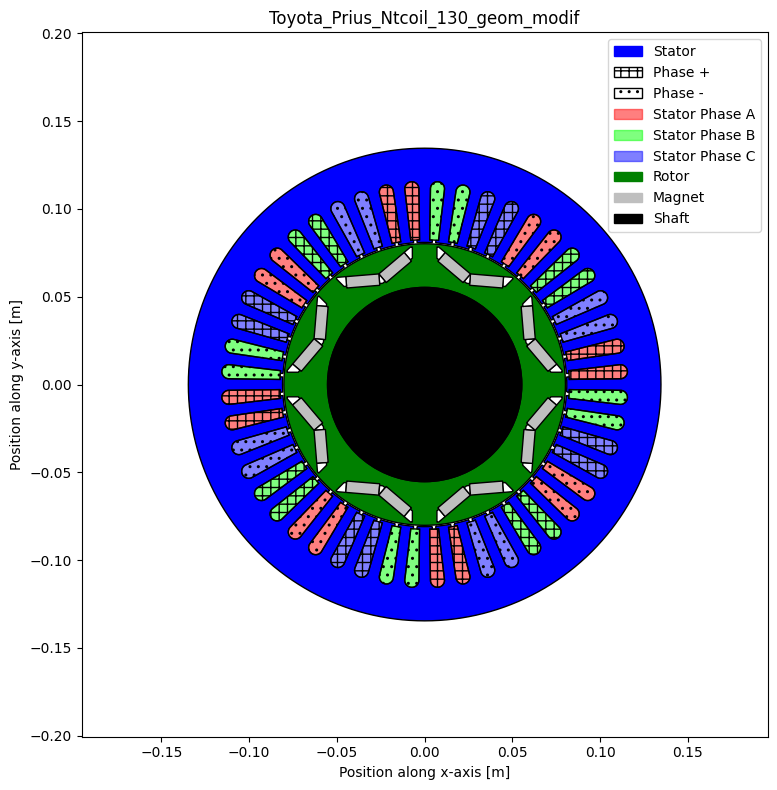

In [9]:
%matplotlib inline

# Load the machine
IPMSM_A = load("machines_custom3/Toyota_Prius_Ntcoil_130_geom_modif.json")
# In Jupyter notebook, we set is_show_fig=False to skip call to fig.show() to avoid a warning message
# All plot methods return the corresponding matplotlib figure and axis to further edit the resulting plot
fig, ax = IPMSM_A.plot(is_show_fig=False)
plt.show()

In [10]:
print(IPMSM_A.stator.winding.wind_mat)

[[[[ 130    0    0]
   [ 130    0    0]
   [   0    0 -130]
   [   0    0 -130]
   [   0  130    0]
   [   0  130    0]
   [-130    0    0]
   [-130    0    0]
   [   0    0  130]
   [   0    0  130]
   [   0 -130    0]
   [   0 -130    0]
   [ 130    0    0]
   [ 130    0    0]
   [   0    0 -130]
   [   0    0 -130]
   [   0  130    0]
   [   0  130    0]
   [-130    0    0]
   [-130    0    0]
   [   0    0  130]
   [   0    0  130]
   [   0 -130    0]
   [   0 -130    0]
   [ 130    0    0]
   [ 130    0    0]
   [   0    0 -130]
   [   0    0 -130]
   [   0  130    0]
   [   0  130    0]
   [-130    0    0]
   [-130    0    0]
   [   0    0  130]
   [   0    0  130]
   [   0 -130    0]
   [   0 -130    0]
   [ 130    0    0]
   [ 130    0    0]
   [   0    0 -130]
   [   0    0 -130]
   [   0  130    0]
   [   0  130    0]
   [-130    0    0]
   [-130    0    0]
   [   0    0  130]
   [   0    0  130]
   [   0 -130    0]
   [   0 -130    0]]]]


In [11]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_ntcoil = load("machines_custom3/Toyota_Prius_Ntcoil_130_geom_modif.json")

In [12]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_ntcoil = load_simulation(name="ntcoil", machine=machine_ntcoil, rotor_speed=3000, stop=1, num_steps=4000)

[19:53:00] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[19:53:00] Starting Magnetic module
[19:53:02] Computing Airgap Flux in FEMM
[19:53:10] End of simulation FEMM_simulation
[19:53:10] Starting running simulation FEMM_simulation (machine=Toyota_Prius_Ntcoil_130_geom_modif)
[19:53:10] Starting Magnetic module
[19:53:11] Computing Airgap Flux in FEMM
[19:53:20] End of simulation FEMM_simulation


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\SciDataTool\Functions\Plot\plot_2D.py:539: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


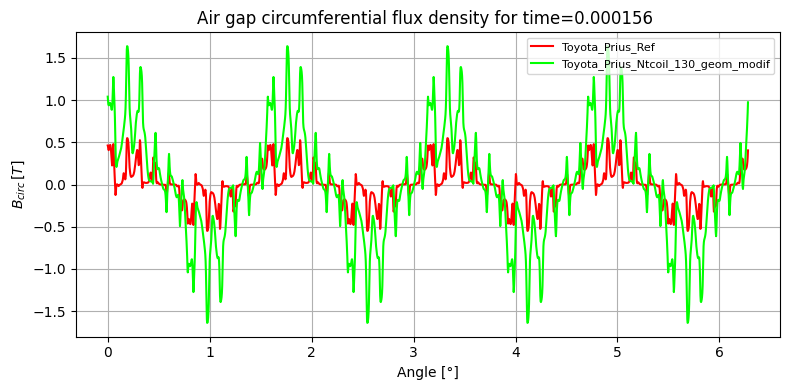

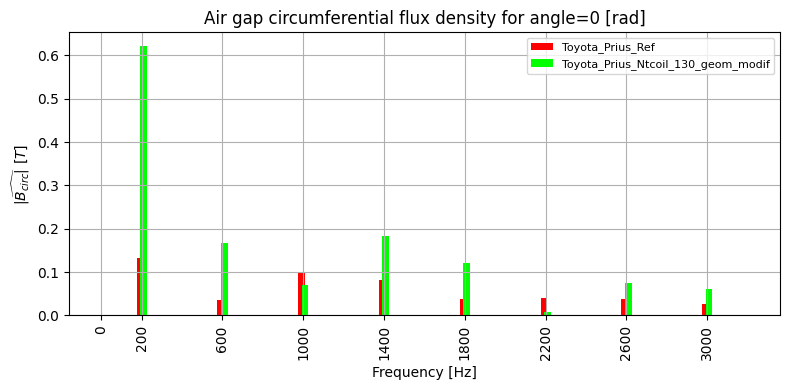

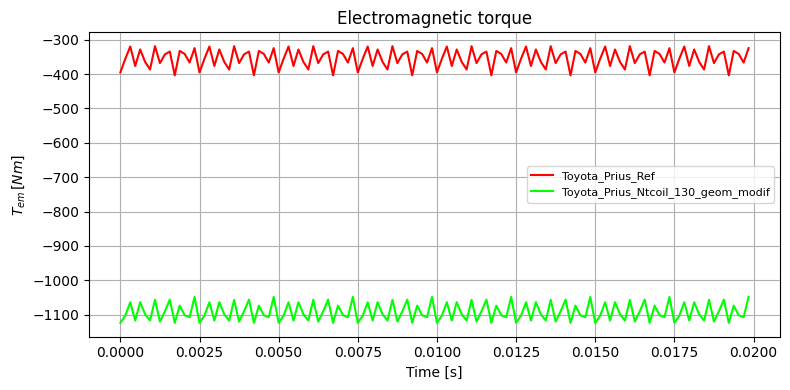

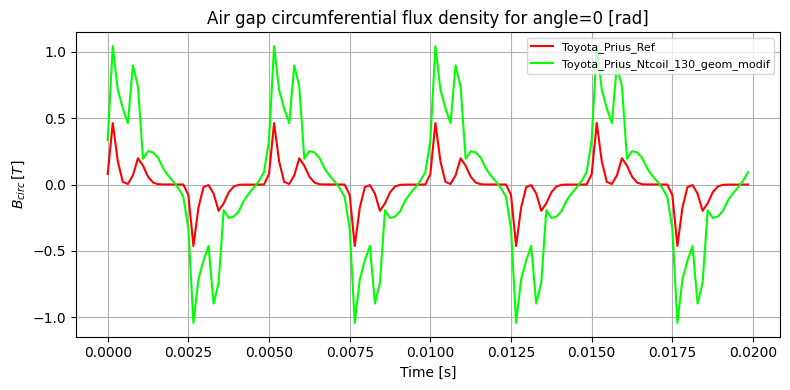

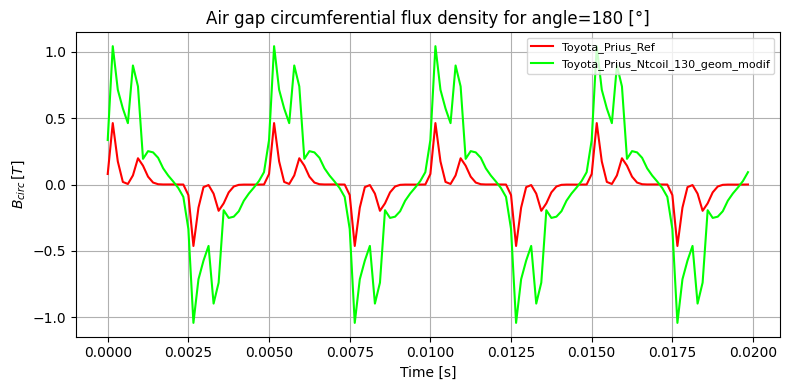

In [13]:
out_ref = simu_ref.run()
out_ntcoil = simu_ntcoil.run()

compare_simulation_results(
    out1=out_ref,
    out2=out_ntcoil,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_Ntcoil_130_geom_modif"]
)

In [14]:
out_ref.save(save_path='machines_custom3/compar_simule', is_folder=True, type_handle_old=2, type_compression=0)

[19:57:49] Saving M400-50A in machines_custom3\compar_simule\M400-50A.json
[19:57:49] Saving M400-50A in machines_custom3\compar_simule\M400-50A_00001.json
[19:57:49] Saving Air in machines_custom3\compar_simule\Air.json
[19:57:49] Saving MagnetPrius in machines_custom3\compar_simule\MagnetPrius.json
[19:57:49] Saving MagnetPrius in machines_custom3\compar_simule\MagnetPrius_00001.json
[19:57:49] Saving M400-50A in machines_custom3\compar_simule\M400-50A_00002.json
[19:57:49] Saving Copper1 in machines_custom3\compar_simule\Copper1.json
[19:57:49] Saving Insulator1 in machines_custom3\compar_simule\Insulator1.json
[19:57:49] Saving Toyota_Prius in machines_custom3\compar_simule\Toyota_Prius.json
[19:57:49] Saving FEMM_simulation in machines_custom3\compar_simule\FEMM_simulation.json
[19:57:49] Saving Output to folder 'machines_custom3\compar_simule' (11 files).
Saving Output to folder 'machines_custom3\compar_simule' (11 files).


In [15]:
out_ntcoil.save(save_path='machines_custom3/compar_simulentcoil', is_folder=True, type_handle_old=2, type_compression=0)

[10:46:02] Saving Material in machines_custom3\compar_simulentcoil\Material.json
[10:46:02] Saving M400-50A in machines_custom3\compar_simulentcoil\M400-50A.json
[10:46:02] Saving M400-50A in machines_custom3\compar_simulentcoil\M400-50A_00001.json
[10:46:02] Saving Air in machines_custom3\compar_simulentcoil\Air.json
[10:46:02] Saving MagnetPrius in machines_custom3\compar_simulentcoil\MagnetPrius.json
[10:46:02] Saving MagnetPrius in machines_custom3\compar_simulentcoil\MagnetPrius_00001.json
[10:46:02] Saving M400-50A in machines_custom3\compar_simulentcoil\M400-50A_00002.json
[10:46:02] Saving Copper1 in machines_custom3\compar_simulentcoil\Copper1.json
[10:46:02] Saving Material in machines_custom3\compar_simulentcoil\Material_00001.json
[10:46:02] Saving Toyota_Prius_Ntcoil_130_geom_modif in machines_custom3\compar_simulentcoil\Toyota_Prius_Ntcoil_130_geom_modif.json
[10:46:02] Saving FEMM_simulation in machines_custom3\compar_simulentcoil\FEMM_simulation.json
[10:46:02] Saving O